##Replicando essa mesma análise.
Uma empresa com funcionários distribuídos em dois turnos (Manhã e Noite), está interessada em verificar se existe uma associação entre o turno de trabalho e o tipo de refeição preferida no refeitório da empresa.

Encontre qual será sua Hipótese nula
 e apresente se a mesma deve ser aceita ou rejeitada.


Tabela de Contingência:
 Refeição  Light  Tradicional  Vegetariana
Turno                                    
Manhã        22           95           33
Noite        26           60           64

Qui-quadrado: 18.14
p-valor: 0.00
Graus de liberdade: 2

Frequências Esperadas:
 Refeição  Light  Tradicional  Vegetariana
Turno                                    
Manhã      24.0         77.5         48.5
Noite      24.0         77.5         48.5


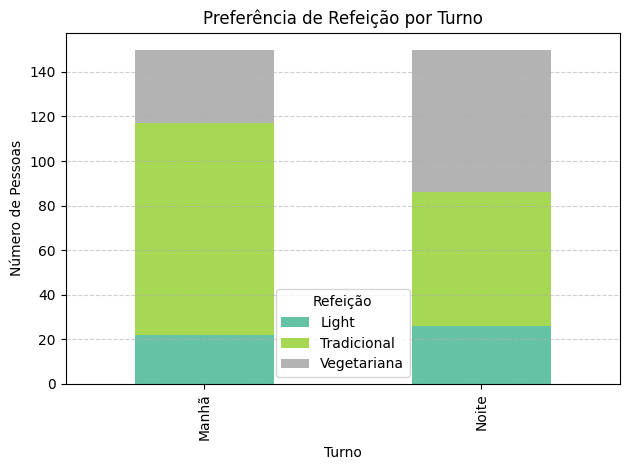


Rejeita-se H₀ (Hipótese Nula): Há associação entre turno e tipo de refeição.


In [27]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Carregando planilha
df_refeicao = pd.read_csv('preferencia_refeicao.csv')

# Criando df
tabela_contingencia = pd.crosstab(df_refeicao['Turno'], df_refeicao['Refeição'])

print("Tabela de Contingência:\n", tabela_contingencia)

# Aplicando o teste do qui-quadrado
qui2, p_valor, dof, esperada = stats.chi2_contingency(tabela_contingencia)

# Imprimindo resultados
print(f"\nQui-quadrado: {qui2:.2f}")
print(f"p-valor: {p_valor:.2f}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências Esperadas:\n", pd.DataFrame(esperada,
      index=tabela_contingencia.index,
      columns=tabela_contingencia.columns))

# Gráfico de barras empilhadas
tabela_contingencia.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Preferência de Refeição por Turno')
plt.xlabel('Turno')
plt.ylabel('Número de Pessoas')
plt.legend(title='Refeição')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Conclusão
if p_valor < 0.05:
    print("\nRejeita-se H₀ (Hipótese Nula): Há associação entre turno e tipo de refeição.")
else:
    print("\nNão se rejeita H₀ (Hipótese Nula): Não há associação entre turno e tipo de refeição.")


##Problema 2: Nivel de satisfação com ensino remoto por curso.

Tabela de Contingência:
 Satisfacao   1   2   3   4   5
Curso                         
Direito      9  22  30  41  48
Física      16  28  38  42  26
Letras      51  44  33  15   7

Qui-quadrado: 94.73
p-valor: 0.00000000000000005
Graus de liberdade: 8

Frequências Esperadas:
 Satisfacao      1      2      3      4     5
Curso                                       
Direito     25.33  31.33  33.67  32.67  27.0
Física      25.33  31.33  33.67  32.67  27.0
Letras      25.33  31.33  33.67  32.67  27.0


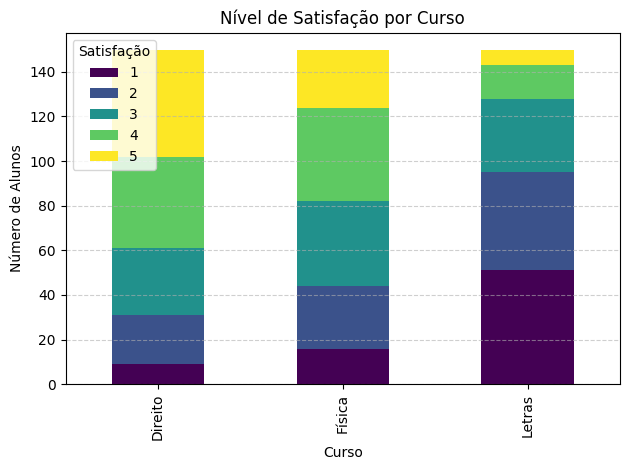


Rejeita-se H₀ (Hipótese Nula): A satisfação depende do curso.


In [26]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Carregando planilha e criando df
df_satisfacao = pd.read_csv('satisfacao_cursos.csv')

# Garantir que Satisfação seja tratada como categórica
df_satisfacao['Satisfacao'] = df_satisfacao['Satisfacao'].astype(str)

# Criar tabela de contingência
tabela_satisfacao = pd.crosstab(df_satisfacao['Curso'], df_satisfacao['Satisfacao'])

print("Tabela de Contingência:\n", tabela_satisfacao)

# Aplicando o teste do qui-quadrado
qui2, p_valor, dof, esperada = stats.chi2_contingency(tabela_satisfacao)

# Imprimindo resultados
print(f"\nQui-quadrado: {qui2:.2f}")
print(f"p-valor: {p_valor:.17f}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências Esperadas:\n", pd.DataFrame(esperada,
      index=tabela_satisfacao.index,
      columns=tabela_satisfacao.columns).round(2))

# Gráfico de barras empilhadas
tabela_satisfacao.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Nível de Satisfação por Curso')
plt.xlabel('Curso')
plt.ylabel('Número de Alunos')
plt.legend(title='Satisfação')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#  Conclusão
if p_valor < 0.05:
    print("\nRejeita-se H₀ (Hipótese Nula): A satisfação depende do curso.")
else:
    print("\nNão se rejeita H₀ (Hipótese Nula): A satisfação não depende do curso.")
